In [85]:
import os
import shutil

def rename_wav_files(root_directory):
    # Ensure the root_directory path ends with a slash for correct path joining
    root_directory = root_directory.rstrip(os.path.sep) + os.path.sep

    # Traverse through all directories and subdirectories
    for dirpath, dirnames, filenames in os.walk(root_directory):
        for filename in filenames:
            if filename.endswith(".wav"):
                # Construct the full path of the original filename
                src = os.path.join(dirpath, filename)

                # Split the filename into parts using whitespace as separator
                parts = filename.split()

                # Extract the relevant parts for renaming
                if len(parts) >= 4:  # Ensure the filename structure is as expected
                    new_filename = f"{parts[0]} {parts[1]} {parts[2]}.wav"
                    dst = os.path.join(dirpath, new_filename)

                    # Rename the file
                    shutil.move(src, dst)
                    print(f"Renamed '{filename}' to '{new_filename}'")

if __name__ == "__main__":
    # Prompt the user to input the root directory path
    root_directory_path = r"D:\Semester Project - Listening Tests\webMUSHRA\configs\resources"
    
    # Call the function to rename the .wav files in the specified root directory and its subdirectories
    rename_wav_files(root_directory_path)

    



In [86]:
#import pandas as pd
#import matplotlib.pyplot as plt
#import numpy as np

## Read the CSV file into a pandas DataFrame
#df = pd.read_csv('results/low_mid_high_instrumentals/bs1116.csv')

#columns_to_extract = [
#    'trial_id',
#    'rating_reference',
#    'rating_non_reference',
#    'rating_reference_score',
#    'rating_non_reference_score'
#]

#df_sorted_NEW = df[columns_to_extract]

#df_sorted_NEW.to_csv("SORTED_NEW.csv", index=False)


#df = pd.read_csv('SORTED_NEW.csv')

## Sort the DataFrame based on the trial_id column
#df_sorted = df.sort_values(by='trial_id', ascending=True)

## Assuming df_sorted is your sorted DataFrame
#trial_ids = df_sorted['trial_id']
#trial_label_reference = df_sorted['rating_reference']
#trial_label_nonreference = df_sorted['rating_non_reference']
##print(trial_ids)
##print(trial_label_reference)
##print(trial_label_nonreference)

## Define the desired order of categories
#category_order = ['Low Instrumentals', 'Mid Instrumentals', 'High Instrumentals']

## Convert trial_ids to categorical type with specified order
#trial_ids = pd.Categorical(trial_ids, categories=category_order, ordered=True)

## Assign the sorted categorical series back to the DataFrame
#df_sorted['trial_id'] = trial_ids

## Sort the DataFrame based on the trial_id column
#df_sorted = df_sorted.sort_values(by='trial_id')

#print(df_sorted)
#df_sorted.to_csv("SORTED_NEW_NEW.csv", index=False)

## Extract relevant data for plotting
#trial_ids = df_sorted['trial_id']
#reference_scores = df_sorted[df_sorted['rating_reference'] == 'reference']['rating_reference_score']
#non_reference_scores = df_sorted[df_sorted['rating_reference'] == 'reference']['rating_non_reference_score']

## Plotting ratings of reference and non-reference trials side by side
#plt.figure(figsize=(12, 6))
#bar_width = 0.5
#index = np.arange(len(trial_ids))

#plt.bar(index, reference_scores, bar_width, label='Reference', color='skyblue')
#plt.bar(index + bar_width, non_reference_scores, bar_width, label='Non-Reference', color='orange')

#plt.xlabel('Trial IDs')
#plt.ylabel('Scores')
#plt.title('Comparison of Ratings between Reference and Non-Reference Trials')
#plt.xticks(index + bar_width / 2, trial_ids, rotation=90)
#plt.legend()
#plt.tight_layout()
#plt.show()

KeyError: "None of [Index(['trial_id', 'rating_reference', 'rating_non_reference',\n       'rating_reference_score', 'rating_non_reference_score'],\n      dtype='object')] are in the [columns]"

In [132]:
import pandas as pd

# Load the sorted CSV file
#df_sorted = pd.read_csv("SORTED_NEW_NEW.csv")
df = pd.read_csv('results/low_mid_high_instrumentals/bs1116.csv')

df_sorted = df
df_sorted = df_sorted[["Name","trial_id","rating_reference","rating_non_reference","rating_reference_score","rating_non_reference_score"]]

# Combine trial IDs with rating_non_reference for x-axis labeling
trial_ids_with_non_ref =  df_sorted['trial_id'] + ' (' + df_sorted['rating_non_reference'] + ')'

# Update the 'trial_id' column with the new combined trial IDs
df_sorted.loc[:,'trial_id'] = trial_ids_with_non_ref

# Extract the trial identifier (last word) from trial_id and create a new column for sorting
df_sorted.loc[:, 'identifier'] = df_sorted['trial_id'].apply(lambda x: x.split()[-1])

# Define the custom sorting order based on the identifier
sorting_order = {
    'C1': 1, 'C2': 2, 'C3': 3, 'C4': 4, 'C5': 5,
    'C6': 6, 'C7': 7, 'C8': 8, 'C9': 9, 'C10': 10,
    'C11': 11, 'C12': 12, 'C13': 13
}

# Map the sorting order to the identifier column
df_sorted.loc[:, 'sorting_order'] = df_sorted['identifier'].map(sorting_order)

# Sort the DataFrame first by the first two words of trial_id, then by sorting_order
df_sorted = df_sorted.sort_values(by=['trial_id', 'sorting_order'])

# Add participant names to trial_id column (optional)
df_sorted['trial_id'] = df_sorted['Name'] + ' ' + df_sorted['trial_id']

# Drop the additional sorting columns
df_sorted.drop(['Name', 'identifier', 'sorting_order'], axis=1, inplace=True)

# Save sorted DataFrame to a new CSV file
df_sorted.to_csv("SORTED.csv", index=False)


C:\Users\simon\AppData\Local\Temp\ipykernel_28348\3647146231.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted.loc[:, 'identifier'] = df_sorted['trial_id'].apply(lambda x: x.split()[-1])
C:\Users\simon\AppData\Local\Temp\ipykernel_28348\3647146231.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted.loc[:, 'sorting_order'] = df_sorted['identifier'].map(sorting_order)


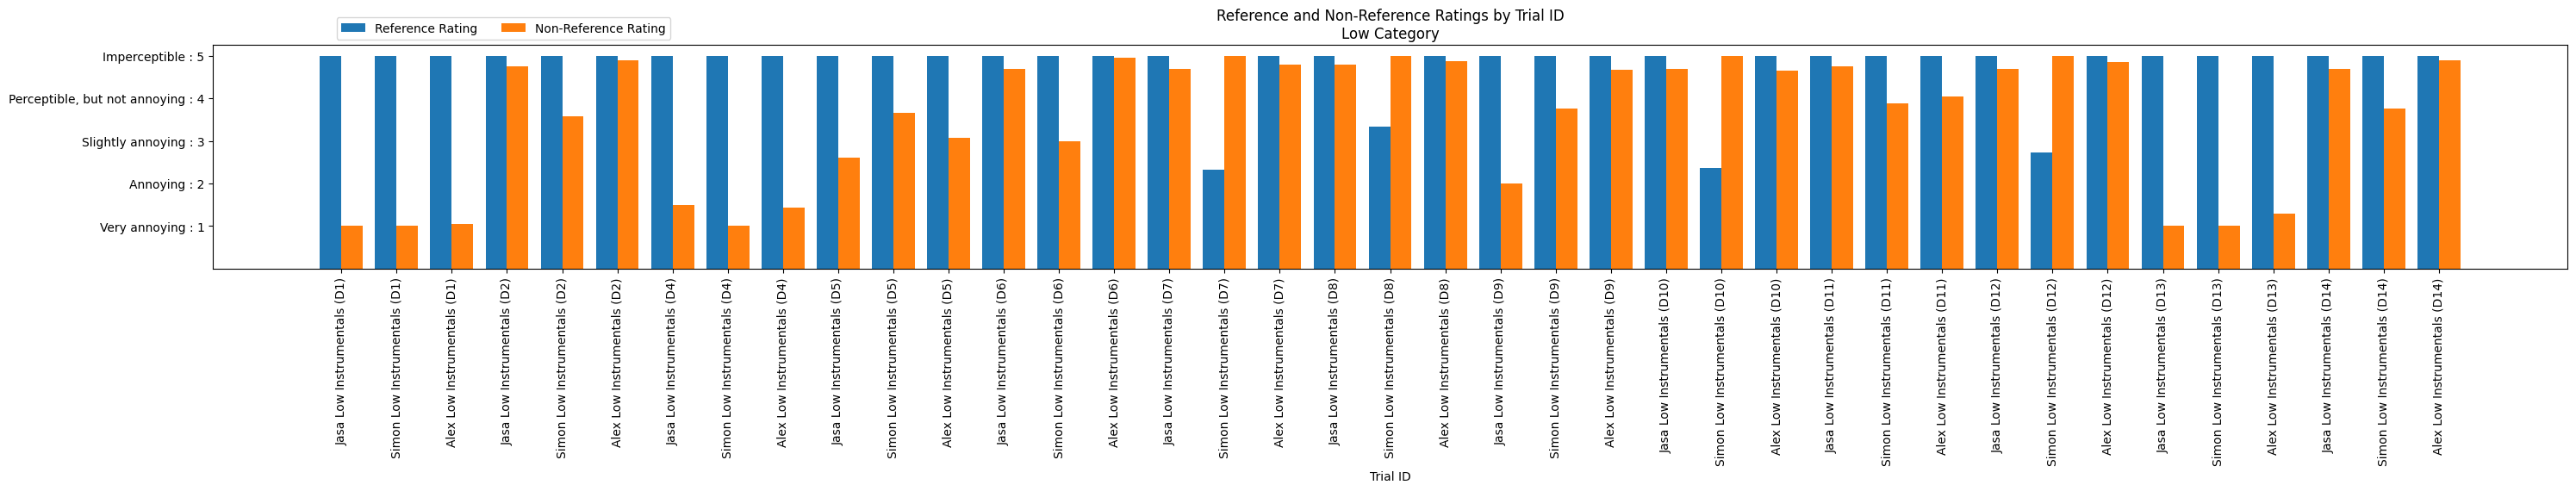

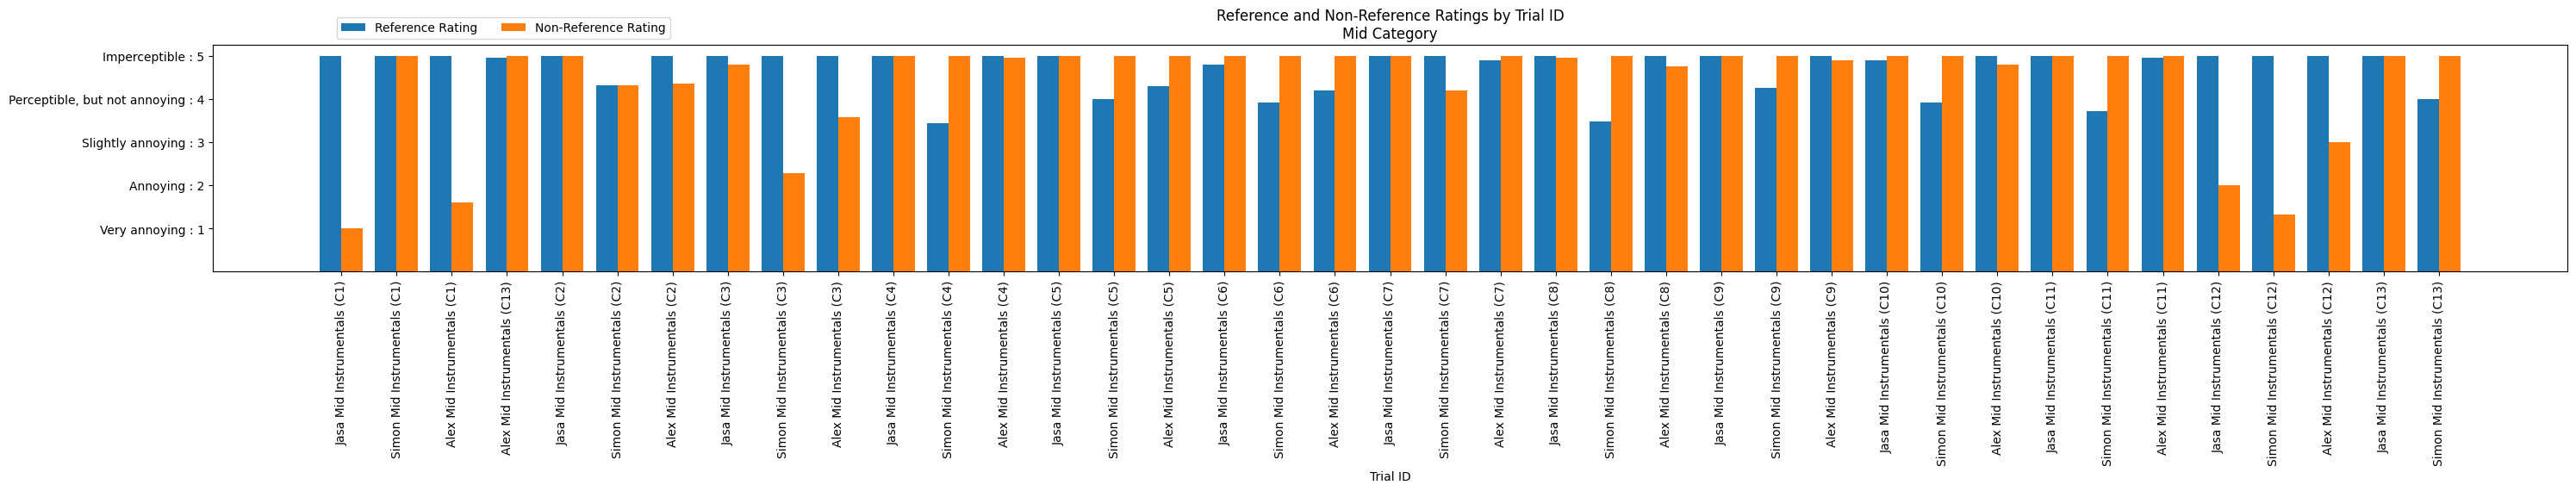

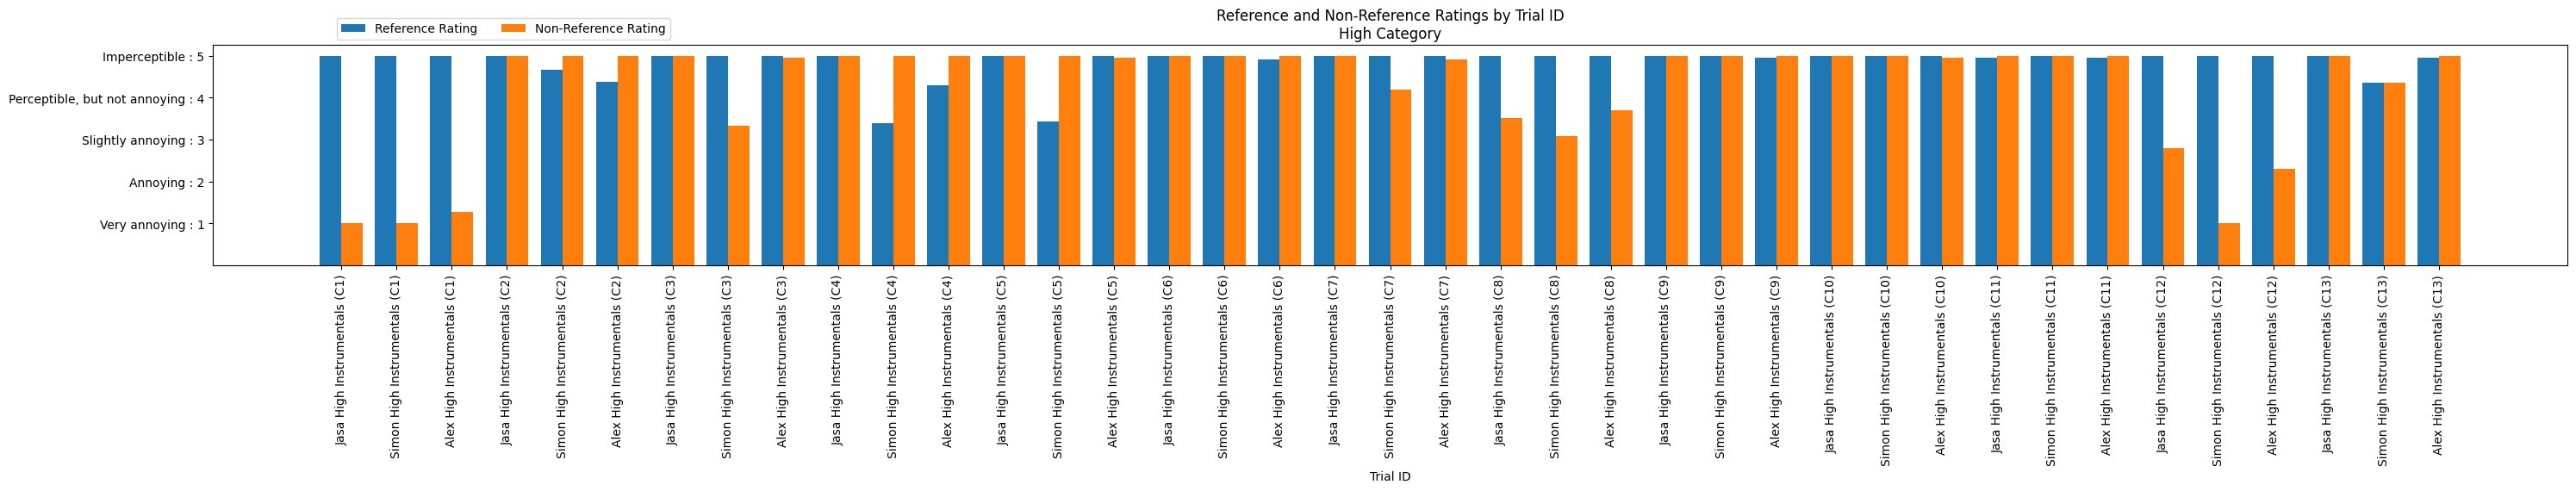

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Function to plot reference and non-reference ratings side by side
def plot_ratings(data, title):
    df_sorted = data
    
    # Create a figure and a set of subplots
    fig, ax = plt.subplots(figsize=(30, 6))
    #fig, ax = plt.subplots()

    # Calculate the number of bars
    num_bars = len(df_sorted)

    # Set the width of each bar and the spacing between groups of bars
    bar_width = 1.75
    spacing = 4.5  # Adjust the spacing factor as needed

    # Calculate the positions for the bars
    bar_positions_ref = np.arange(num_bars) * spacing - bar_width / 2
    bar_positions_non_ref = np.arange(num_bars) * spacing + bar_width / 2

    # Create a bar plot for reference ratings
    ax.bar(bar_positions_ref, df_sorted['rating_reference_score'], width=bar_width, label='Reference Rating')

    # Create a bar plot for non-reference ratings
    ax.bar(bar_positions_non_ref, df_sorted['rating_non_reference_score'], width=bar_width, label='Non-Reference Rating')

    # Set the title and labels
    ax.set_title(f'Reference and Non-Reference Ratings by Trial ID\n{title}')
    ax.set_xlabel('Trial ID')
    #ax.set_ylabel('Rating')

    # Set custom x-tick positions and labels
    tick_positions = np.arange(num_bars) * spacing
    tick_labels = df_sorted['trial_id'].tolist()

    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels, rotation=90)
    
    # Set custom y-tick labels based on ITU-R BS.1116 recommendation
    ytick_labels = {
        5: 'Imperceptible : 5',
        4: 'Perceptible, but not annoying : 4',
        3: 'Slightly annoying : 3',
        2: 'Annoying : 2',
        1: 'Very annoying : 1'
    }

    # Set y-tick positions and labels
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_yticklabels([ytick_labels[tick] for tick in [1,2,3,4,5]])

    # Add a legend outside the plot area
    ax.legend(loc='upper left', bbox_to_anchor=(0.05, 1.15), ncol=2)  # Adjust the position and layout

    # Show the plot
    plt.tight_layout()
    plt.show()


# Function to replace identifiers in trial_id column using mapping_drivers
def replace_identifiers(df):
    # Define the mapping between the categories and the drivers
    mapping_drivers = {
        "C1": "D1",
        "C2": "D2",
        "C3": "D4",
        "C4": "D5",
        "C5": "D6",
        "C6": "D7",
        "C7": "D8",
        "C8": "D9",
        "C9": "D10",
        "C10": "D11",
        "C11": "D12",
        "C12": "D13",
        "C13": "D14"
    }
    
    # Extract the identifier within parentheses from the 'trial_id' column
    df.loc[:, 'trial_id'] = df['trial_id'].apply(lambda x: re.sub(r'\((.*?)\)', lambda m: f'({mapping_drivers[m.group(1)]})', x))
    return df

# Read the CSV into a DataFrame
#df_sorted = pd.read_csv('sorted_output.csv')
df_sorted = pd.read_csv('SORTED.csv')


# Filter df_sorted for low, mid, and high categories
df_low = df_sorted['trial_id'].str.contains('Low')
df_mid = df_sorted['trial_id'].str.contains('Mid')
df_high = df_sorted['trial_id'].str.contains('High')
df_sorted_low = df_sorted[df_low]
df_sorted_mid = df_sorted[df_mid]
df_sorted_high = df_sorted[df_high]

#print(df_sorted_low)

# Apply replacement to each filtered DataFrame
df_sorted_low = replace_identifiers(df_sorted_low)
#df_sorted_mid = replace_identifiers(df_sorted_mid)
#df_sorted_high = replace_identifiers(df_sorted_high)

#print("Low category after replacement:")
#print(df_sorted_low)

#print("\nMid category after replacement:")
#print(df_sorted_mid)

#print("\nHigh category after replacement:")
#print(df_sorted_high)

#print("Low category:")
#print(df_sorted_low)

#print("\nMid category:")
#print(df_sorted_mid)

#print("\nHigh category:")
#print(df_sorted_high)

plot_ratings(df_sorted_low, 'Low Category')
plot_ratings(df_sorted_mid, 'Mid Category')
plot_ratings(df_sorted_high, 'High Category')


In [ ]:
def statistics(df):
    # Calculate the mean rating across low, mid, and high categories
    mean_rating = df['rating_reference_score'].mean()
    
    print(mean_rating)
    


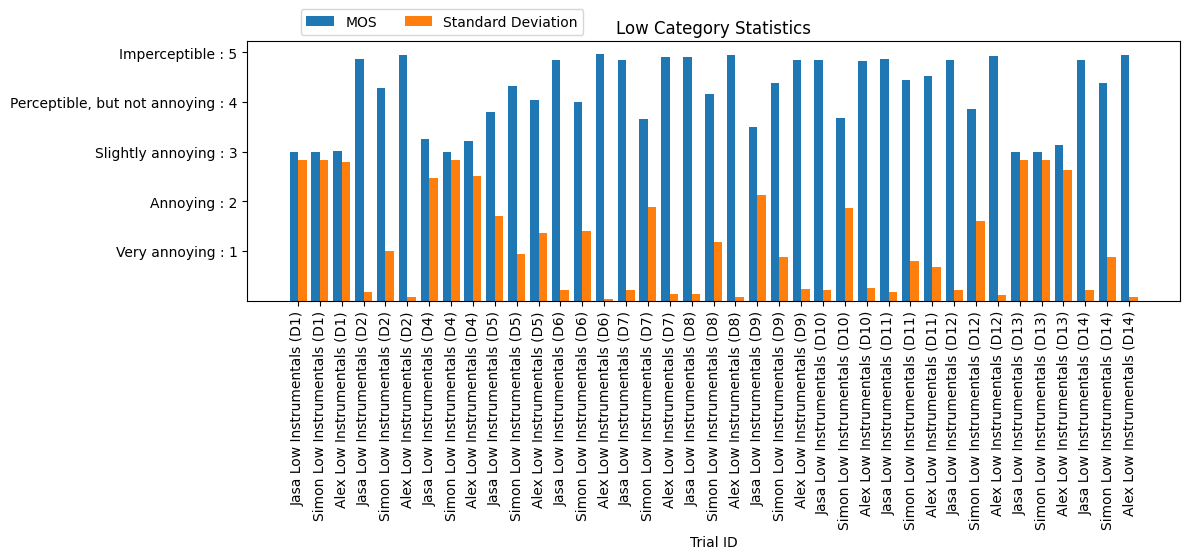

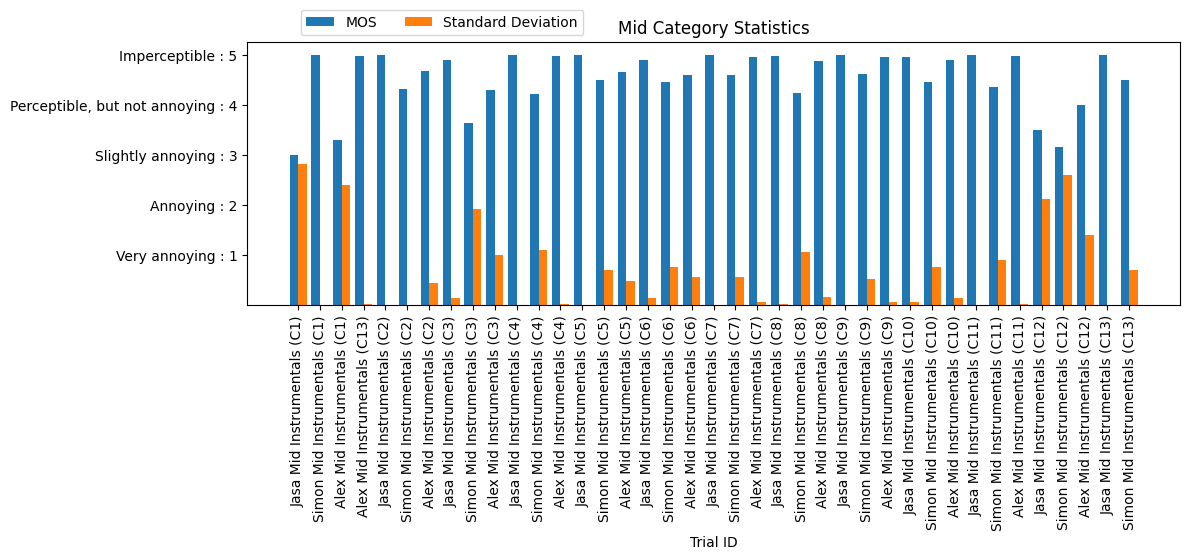

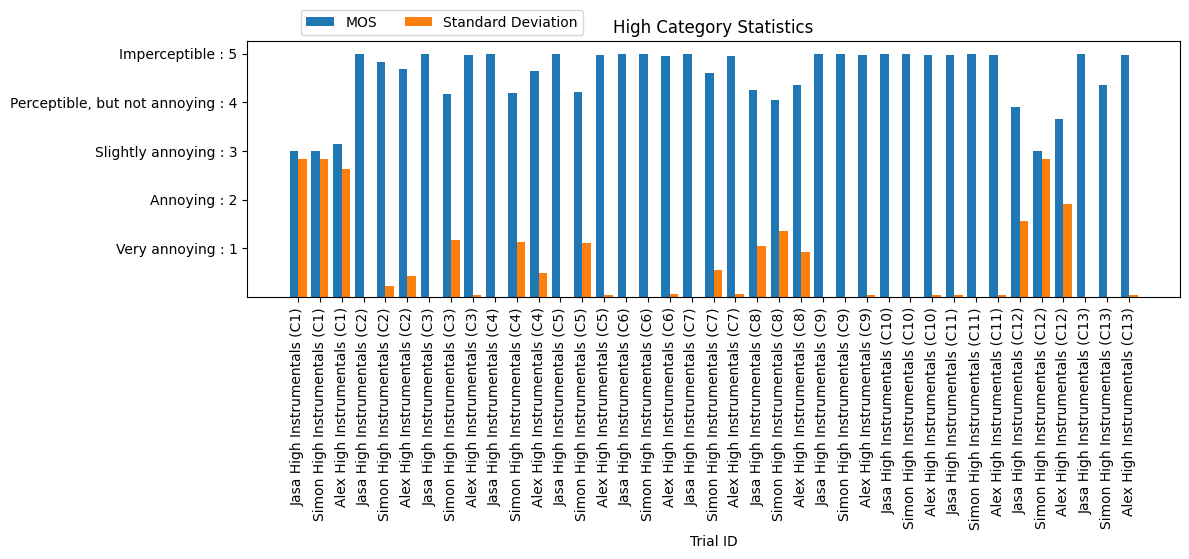

In [194]:
# Function to calculate mean opinion score (MOS) and standard deviation
def calculate_statistics(df):
    df.loc[:,'MOS'] = df[['rating_reference_score', 'rating_non_reference_score']].mean(axis=1)
    df.loc[:,'Standard Deviation'] = df[['rating_reference_score', 'rating_non_reference_score']].std(axis=1)
    return df

# Function to plot MOS and Standard Deviation
def plot_statistics(df, category):
    labels = df['trial_id']
    mos_values = df['MOS']
    std_dev_values = df['Standard Deviation']

    x = np.arange(len(labels))  # the label locations

    # Set the width of each bar and the spacing between groups of bars
    bar_width = 1.75  # Width of each bar
    spacing = 4.5  # Space between the 'MOS' and 'Standard Deviation' bars for each trial

    fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the figure size as needed

    # Calculate the positions for the bars
    bar_positions_mos = x * spacing - bar_width / 2
    bar_positions_std_dev = x * spacing + bar_width / 2

    # Create a bar plot for MOS values
    ax.bar(bar_positions_mos, mos_values, width=bar_width, label='MOS')

    # Create a bar plot for Standard Deviation values
    ax.bar(bar_positions_std_dev, std_dev_values, width=bar_width, label='Standard Deviation')

    # Set custom y-tick labels based on ITU-R BS.1116 recommendation
    ytick_labels = {
        5: 'Imperceptible : 5',
        4: 'Perceptible, but not annoying : 4',
        3: 'Slightly annoying : 3',
        2: 'Annoying : 2',
        1: 'Very annoying : 1'
    }

    # Set y-tick positions and labels
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_yticklabels([ytick_labels[tick] for tick in [1,2,3,4,5]])
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Trial ID')
    ax.set_title(f'{category} Category Statistics')
    ax.set_xticks(x * spacing)
    ax.set_xticklabels(labels, rotation=90)
    
    # Add a legend outside the plot area
    ax.legend(loc='upper left', bbox_to_anchor=(0.05, 1.15), ncol=2)  # Adjust the position and layout


    fig.tight_layout()
    plt.show()
    
# Apply the function to each filtered DataFrame
df_sorted_low = calculate_statistics(df_sorted_low)
df_sorted_mid = calculate_statistics(df_sorted_mid)
df_sorted_high = calculate_statistics(df_sorted_high)

# Plot the statistics for each category
plot_statistics(df_sorted_low, 'Low')
plot_statistics(df_sorted_mid, 'Mid')
plot_statistics(df_sorted_high, 'High')